In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima

In [2]:
df=pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)
df = df.set_index(['Month'])
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
df.dtypes

#Passengers    int64
dtype: object

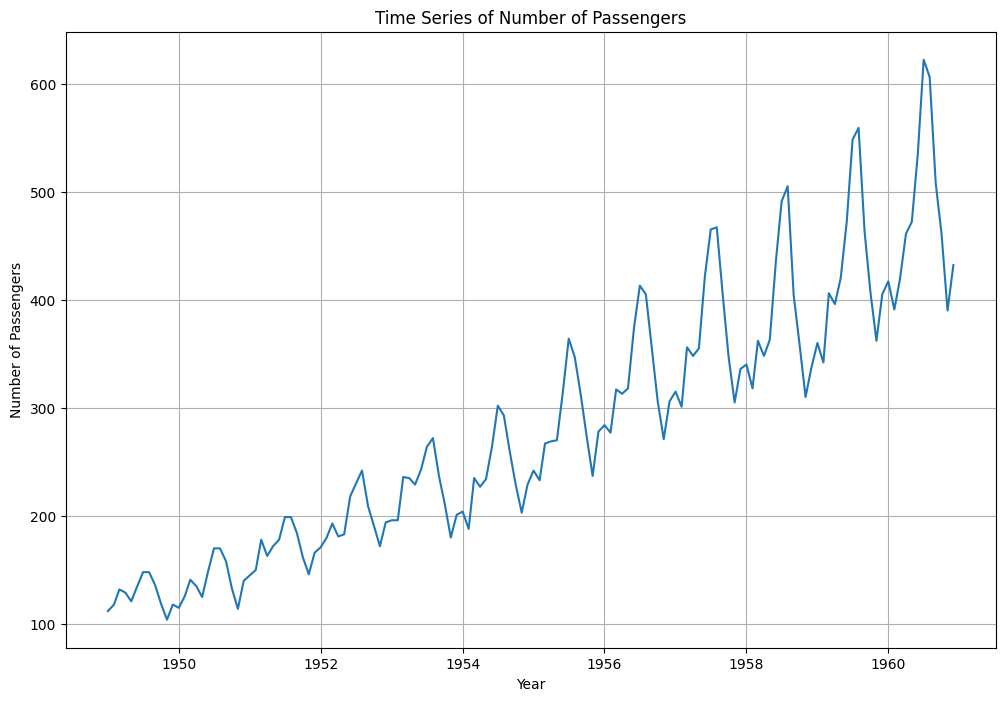

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['#Passengers'])
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Time Series of Number of Passengers')
plt.grid(True)
plt.show()

In [7]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
dfff=df.copy()
dfff

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
#rolling statistics
df["rolling_avg"] = df["#Passengers"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
df["rolling_std"] = df["#Passengers"].rolling(window=12).std()

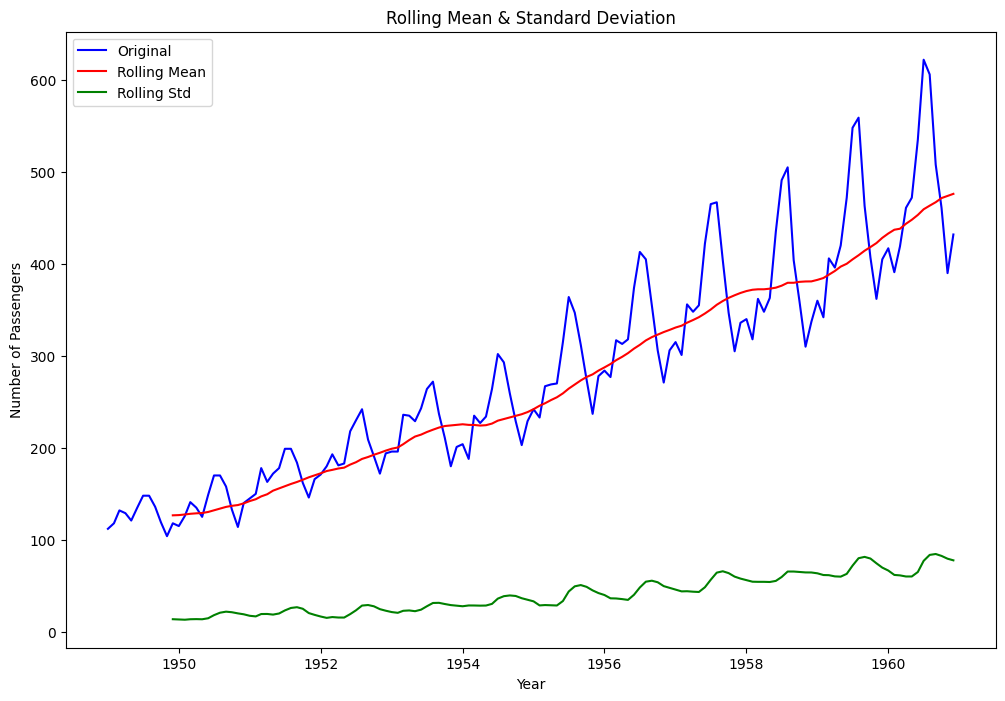

In [10]:
#Plot rolling statistics
plt.figure(figsize=(12,8))
plt.plot(df["#Passengers"], color='blue', label='Original')
plt.plot(df["rolling_avg"], color='red', label='Rolling Mean')
plt.plot(df["rolling_std"], color='green', label='Rolling Std')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [11]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dft = adfuller(df['#Passengers'], autolag='AIC')

dfo = pd.Series(dft[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dft[4].items():
    dfo['Critical Value (%s)'%key] = value
    
print(dfo)

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [12]:
import statsmodels.api as sm

def adf_test(timeseries):
    result = sm.tsa.adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Number of Lags Used:', result[2])
    print('Number of Observations Used:', result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Assuming you have your time series data loaded into a pandas Series named `time_series_data`
adf_test(df['#Passengers'])

ADF Statistic: 0.8153688792060543
p-value: 0.9918802434376411
Number of Lags Used: 13
Number of Observations Used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


In [13]:
df

,#Passengers,rolling_avg,rolling_std
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,463.333333,83.630500
1960-09-01,508,467.083333,84.617276
1960-10-01,461,471.583333,82.541954


In [14]:
###critical value is not greater than test statistics and p-value is greater than 0.05.This indicates the non-stationarity.

In [15]:
df1=df
df1

,#Passengers,rolling_avg,rolling_std
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,463.333333,83.630500
1960-09-01,508,467.083333,84.617276
1960-10-01,461,471.583333,82.541954


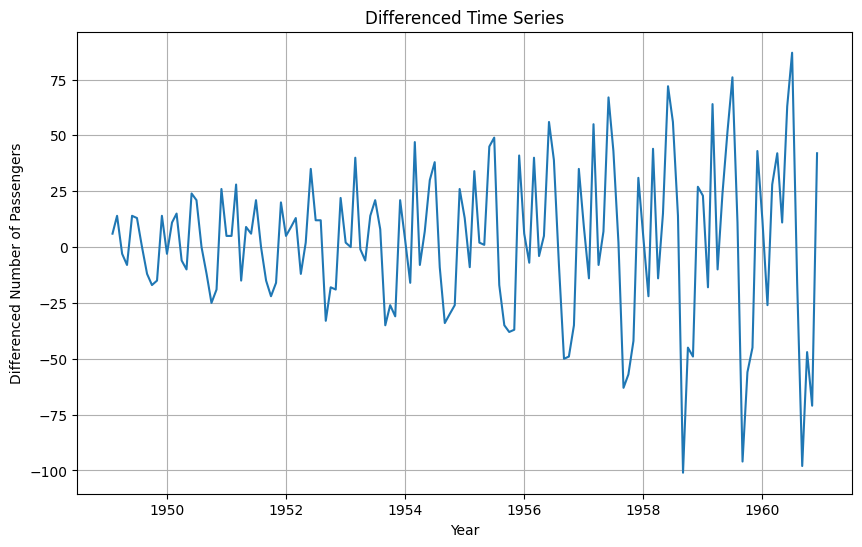

In [16]:
# Perform first-order differencing
df1['Differenced_Passengers'] = df1['#Passengers'].diff()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df1['Differenced_Passengers'])
plt.xlabel('Year')
plt.ylabel('Differenced Number of Passengers')
plt.title('Differenced Time Series')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [17]:
# Check for missing values in the exogenous variables
print(df1['Differenced_Passengers'].isna().sum())


1


In [18]:
df_exog_clean = df1.dropna()  # Drop rows with NaN values
#df = pd.merge(df, df_exog_clean, left_index=True, right_index=True)
#df

In [19]:
dfn=df_exog_clean
dfn

,#Passengers,rolling_avg,rolling_std,Differenced_Passengers
Month,,,,
1949-12-01,118,126.666667,13.720147,14.0
1950-01-01,115,126.916667,13.453342,-3.0
1950-02-01,126,127.583333,13.166475,11.0
1950-03-01,141,128.333333,13.686977,15.0
1950-04-01,135,128.833333,13.822467,-6.0
...,...,...,...,...
1960-08-01,606,463.333333,83.630500,-16.0
1960-09-01,508,467.083333,84.617276,-98.0
1960-10-01,461,471.583333,82.541954,-47.0


In [20]:
adf_test(dfn['Differenced_Passengers'])

ADF Statistic: -2.719696946689132
p-value: 0.07069141493556737
Number of Lags Used: 12
Number of Observations Used: 120
Critical Values:
   1%: -3.486055829282407
   5%: -2.8859430324074076
   10%: -2.5797850694444446


In [21]:
df

,#Passengers,rolling_avg,rolling_std,Differenced_Passengers
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,6.0
1949-03-01,132,NaN,NaN,14.0
1949-04-01,129,NaN,NaN,-3.0
1949-05-01,121,NaN,NaN,-8.0
...,...,...,...,...
1960-08-01,606,463.333333,83.630500,-16.0
1960-09-01,508,467.083333,84.617276,-98.0
1960-10-01,461,471.583333,82.541954,-47.0


In [22]:

# Perform seasonal differencing
period = 12  # Replace '12' with your seasonality (e.g., 4 for quarterly data, 7 for weekly data, etc.)
df['Seasonal_Diff'] = df['#Passengers'].diff(periods=period)

# Drop NaN values resulting from the differencing
df.dropna(inplace=True)

# Check the stationarity of the differenced series using the Augmented Dickey-Fuller test
adf_test(df['Seasonal_Diff'])


ADF Statistic: -3.3830207264924805
p-value: 0.011551493085514982
Number of Lags Used: 1
Number of Observations Used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


In [23]:
df

,#Passengers,rolling_avg,rolling_std,Differenced_Passengers,Seasonal_Diff
Month,,,,,
1950-01-01,115,126.916667,13.453342,-3.0,3.0
1950-02-01,126,127.583333,13.166475,11.0,8.0
1950-03-01,141,128.333333,13.686977,15.0,9.0
1950-04-01,135,128.833333,13.822467,-6.0,6.0
1950-05-01,125,129.166667,13.663710,-10.0,4.0
...,...,...,...,...,...
1960-08-01,606,463.333333,83.630500,-16.0,47.0
1960-09-01,508,467.083333,84.617276,-98.0,45.0
1960-10-01,461,471.583333,82.541954,-47.0,54.0


In [24]:
### Stationarity is achieved by seasonal diff of 12


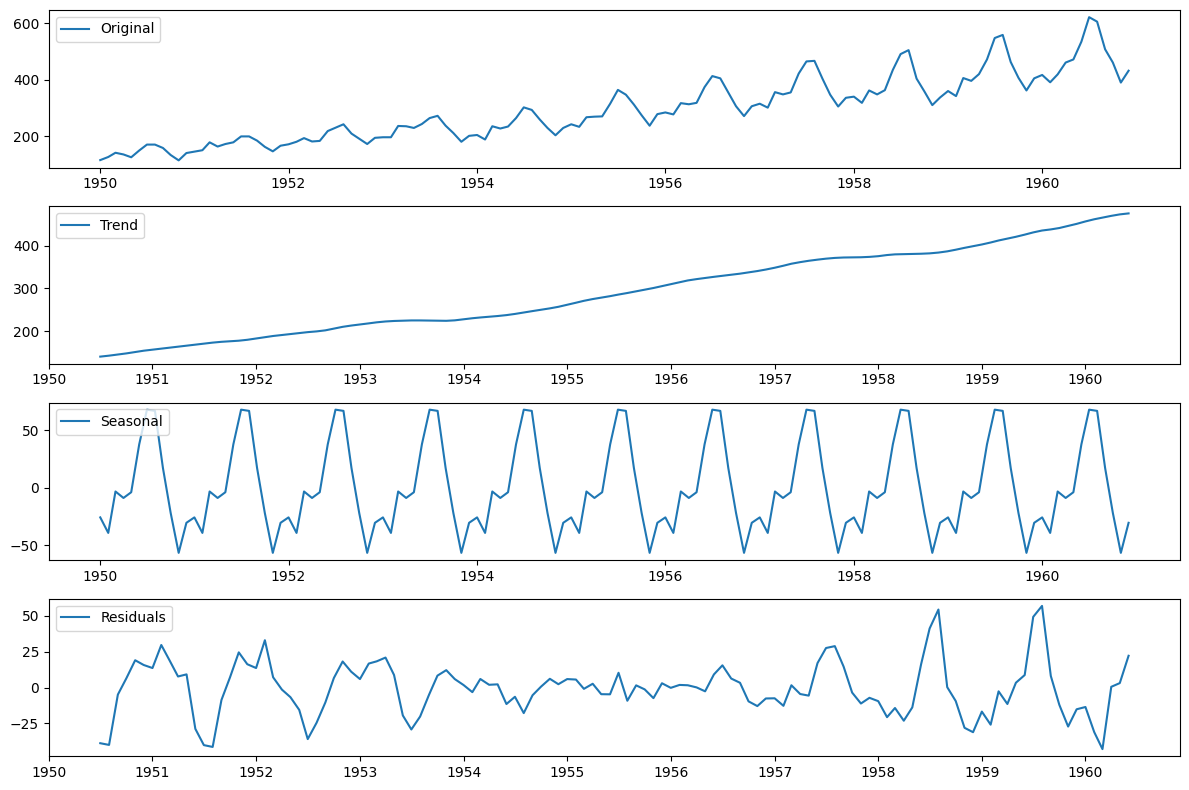

In [25]:
# Step 1: Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df['#Passengers'], period=12)

# Step 2: Plot the decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['#Passengers'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




In [26]:
time_series_data = df['#Passengers']

# Calculate ACF and PACF
acf = sm.tsa.stattools.acf(time_series_data, nlags=12)
pacf = sm.tsa.stattools.pacf(time_series_data, nlags=12)

<Figure size 1200x600 with 0 Axes>

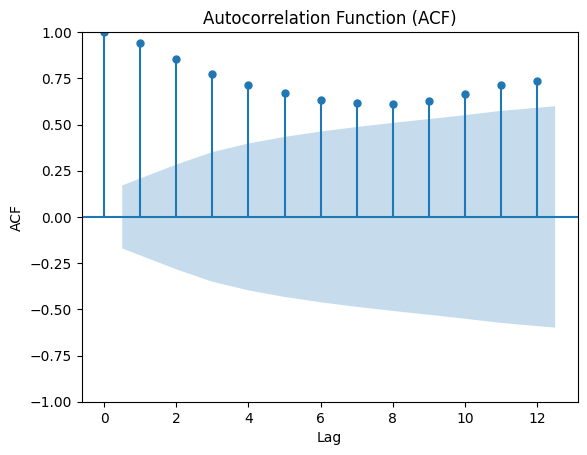

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

<Figure size 1200x600 with 0 Axes>

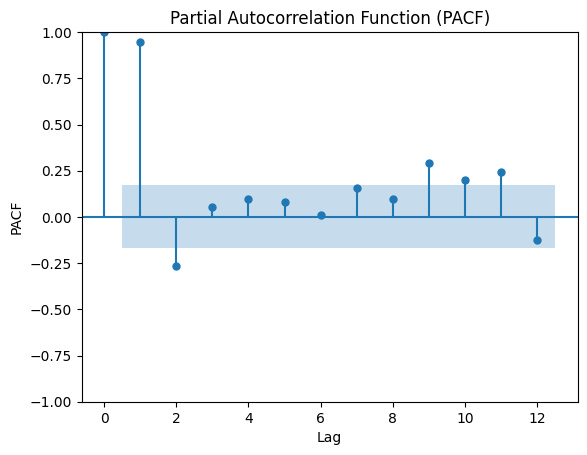

In [27]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(time_series_data, lags=12, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(time_series_data, lags=12, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')

In [28]:
from pmdarima.arima import auto_arima
model = auto_arima(time_series_data, seasonal=True, m=12, stepwise=True, trace=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1027.568, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=939.882, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=981.204, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1214.293, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=939.854, Time=0.08 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=940.013, Time=0.16 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=941.789, Time=0.39 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=936.225, Time=0.14 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=936.805, Time=0.38 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=937.084, Time=0.30 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=937.257, Time=0.20 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=937.580, Time=0.20 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : 

In [29]:
# Step 1: Split the data into training and test sets
train_size = int(0.8 * len(df))
train_data = df['#Passengers'].iloc[:train_size]
test_data = df['#Passengers'].iloc[train_size:]

In [30]:
order = (2, 0, 0)  # ARIMA order (p, d, q)
seasonal_order = (0, 1, 0, 12)  # Seasonal order (P, D, Q, S)
model = sm.tsa.SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
results = model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
# Step 3: Make predictions on the test data
forecast = results.get_forecast(steps=len(test_data))

In [32]:
# Step 4: Evaluate the forecast accuracy
predicted_values = forecast.predicted_mean
actual_values = test_data

In [33]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 12.48%


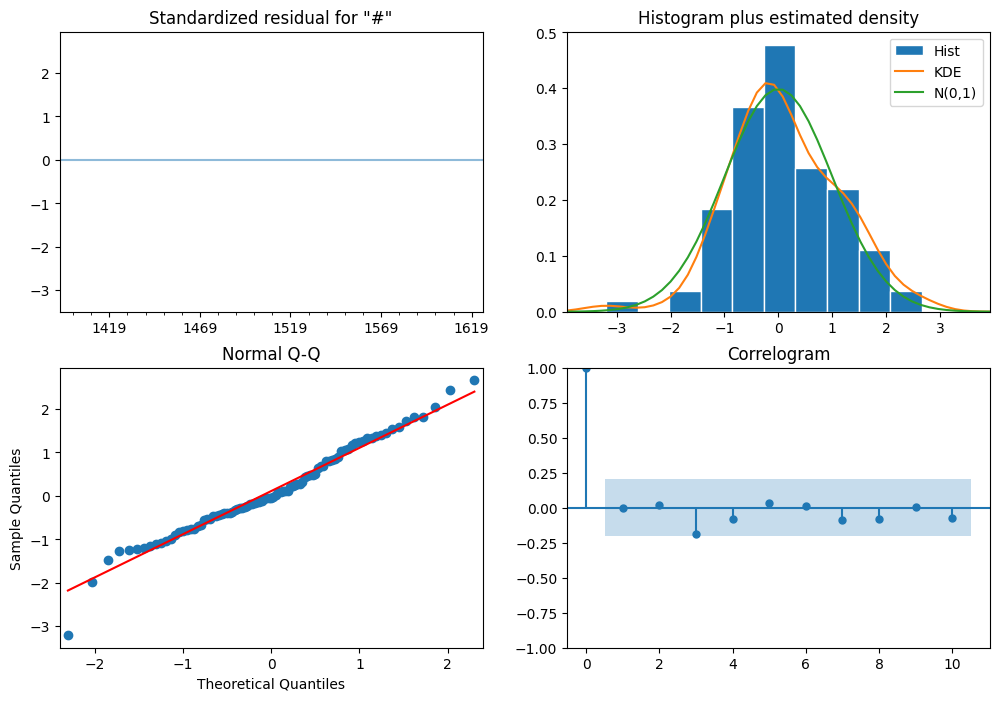

In [34]:
#Visualize the diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.show()

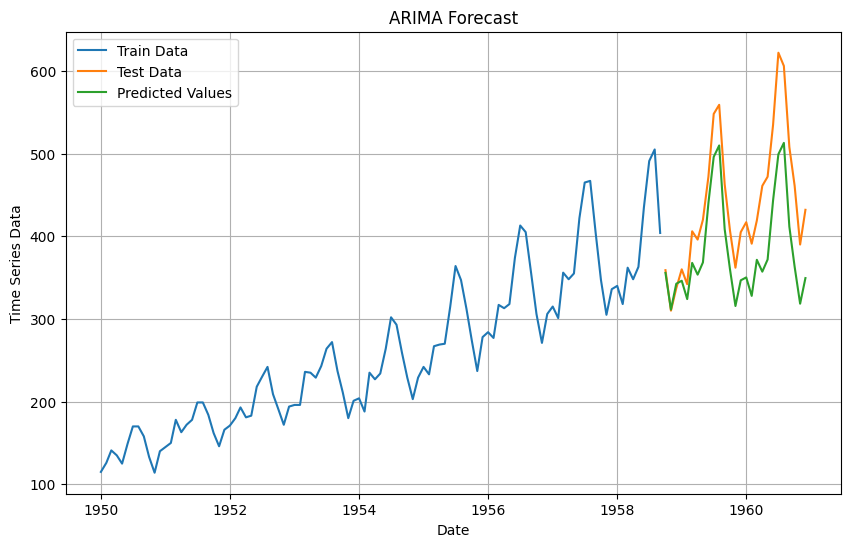

In [35]:
# Step 5: Optionally, visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, actual_values, label='Test Data')
plt.plot(test_data.index, predicted_values, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Time Series Data')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.show()